In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
kilid= pd.read_csv("kilid.csv")

In [114]:
kilid.head()

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه..."
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت..."
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز"
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن"
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی..."


In [115]:
kilid.describe()

,district_number,real_estate_area,total_rooms,number_of_parking,real_estate_age,price
count,29954.000000,29954.000000,29954.000000,29954.000000,29954.000000,2.995400e+04
mean,3.026808,146.204881,2.196034,1.240101,9.509114,3.110369e+10
std,1.886007,388.138720,1.224873,1.638835,10.258502,1.029106e+12
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,75.000000,2.000000,1.000000,0.000000,5.500000e+09
50%,2.000000,105.000000,2.000000,1.000000,8.000000,1.020000e+10
75%,5.000000,150.000000,3.000000,1.000000,17.000000,2.000000e+10
max,9.000000,35000.000000,100.000000,187.000000,401.000000,1.521000e+14


In [116]:
kilid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29954 entries, 0 to 29953
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_number    29954 non-null  int64  
 1   district_name      29954 non-null  object 
 2   real_estate_type   29954 non-null  object 
 3   real_estate_area   29954 non-null  float64
 4   total_rooms        29954 non-null  int64  
 5   number_of_parking  29954 non-null  int64  
 6   real_estate_age    29954 non-null  int64  
 7   price              29954 non-null  float64
 8   facilities         28458 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 2.1+ MB


In [117]:
kilid.facilities[kilid.facilities.isnull() == True] = ""

D:\document of c\Temp\ipykernel_1936\2916755071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kilid.facilities[kilid.facilities.isnull() == True] = ""


In [118]:
exploded_df = kilid['facilities'].map(lambda x:x.split(",")).explode()

one_hot_encoded = pd.get_dummies(exploded_df , dtype="int")

result_df = one_hot_encoded.groupby(one_hot_encoded.index).sum()

result_df.drop(columns="",  inplace=True)

In [119]:
merged_df = kilid.merge(result_df, left_index=True, right_index=True)

merged_df

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,0,1,0,0,0,0,0
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,0
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,0,1,0,0,0,0,0
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,0
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,0,1,1,0,0,0,0
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,0
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,0
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,0,1,1,0,0,0,0


In [120]:
list_of_facilities=merged_df['facilities'].str.split(',').explode().value_counts()

In [121]:
list_of_facilities

facilities
انباری           26866
آسانسور          22611
بالکن            21473
درب ریموت        15515
لابی             12408
آنتن مرکزی       12290
نگهبان           11517
تهویه مطبوع      10370
سالن اجتماعات     8032
نوساز             6932
سالن ورزش         5861
روف گاردن         5702
جکوزی             5085
سونا              4939
استخر             4811
وام دار           2544
قدرالسهم          2380
قیمت توافقی       2172
                  1496
پیش فروش           904
معاوضه             478
مال                189
مشارکتی            129
موقعیت اداری        83
پاساژ               62
قابل تبدیل           3
پارکینگ              1
Name: count, dtype: int64

In [122]:
merged_df.columns

Index(['district_number', 'district_name', 'real_estate_type',
       'real_estate_area', 'total_rooms', 'number_of_parking',
       'real_estate_age', 'price', 'facilities', 'آسانسور', 'آنتن مرکزی',
       'استخر', 'انباری', 'بالکن', 'تهویه مطبوع', 'جکوزی', 'درب ریموت',
       'روف گاردن', 'سالن اجتماعات', 'سالن ورزش', 'سونا', 'قابل تبدیل',
       'قدرالسهم', 'قیمت توافقی', 'لابی', 'مال', 'مشارکتی', 'معاوضه',
       'موقعیت اداری', 'نوساز', 'نگهبان', 'وام دار', 'پارکینگ', 'پاساژ',
       'پیش فروش'],
      dtype='object')

In [123]:
residental=merged_df[merged_df['real_estate_type']=='آپارتمان/برج'].copy()
residental

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مال,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,0,1,0,0,0,0,0
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,0
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,0,1,0,0,0,0,0
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,0
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,0,1,1,0,0,0,0
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,0
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,0
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,0,1,1,0,0,0,0


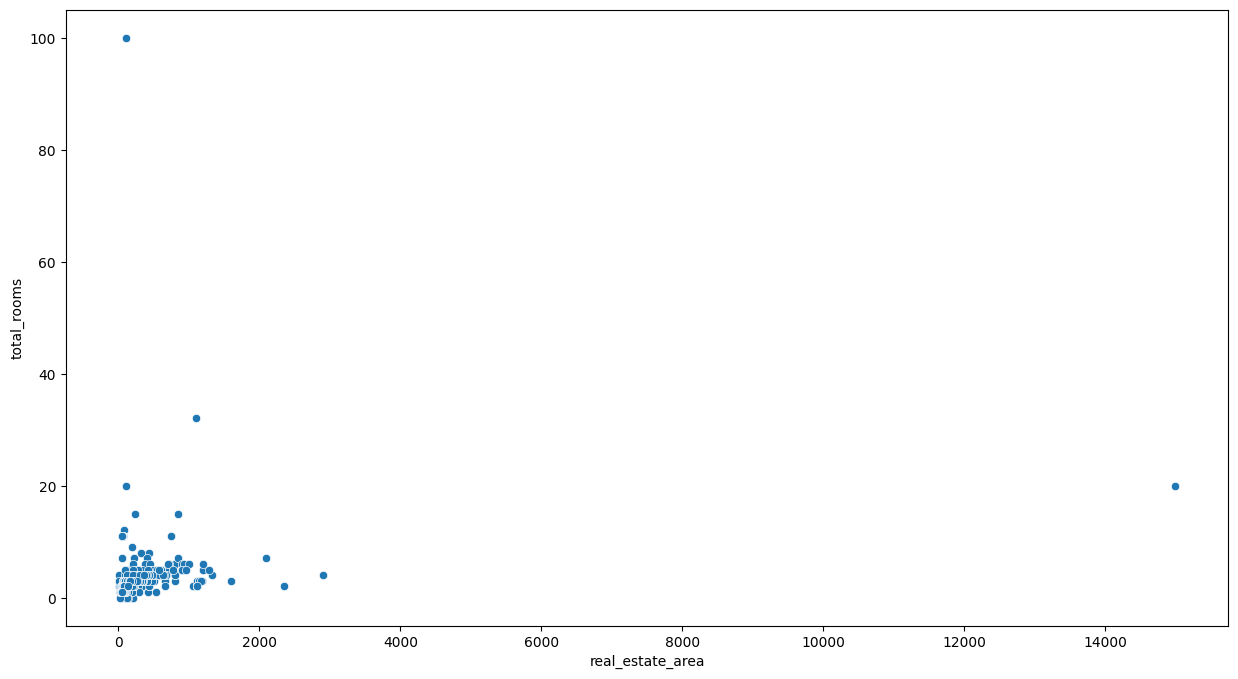

In [124]:
attributes = ["real_estate_area", "total_rooms"]
# pd.plotting.scatter_matrix(merged_df[attributes],figsize=(20,10));
plt.figure(figsize=(15,8))
sns.scatterplot(x=residental[attributes[0]],y=residental[attributes[1]]);

In [125]:
residental.drop_duplicates(inplace=True)

In [126]:
residental.drop(residental[(residental['real_estate_area']>1000)|(residental['total_rooms']>10)|(residental['real_estate_age']==401)].index,inplace=True)

In [127]:
residental.drop(residental[residental['number_of_parking']>11].index,inplace=True)

In [128]:
residental["price_per_metr"] = residental["price"] / residental["real_estate_area"]

In [129]:
residental

,district_number,district_name,real_estate_type,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,facilities,آسانسور,...,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش,price_per_metr
0,2,ستارخان,آپارتمان/برج,116.0,3,1,0,1.370000e+10,"آسانسور,لابی,آنتن مرکزی,درب ریموت,انباری,تهویه...",1,...,0,0,0,1,0,0,0,0,0,1.181034e+08
1,2,ستارخان,آپارتمان/برج,120.0,2,1,7,1.160000e+10,"تهویه مطبوع,آنتن مرکزی,آسانسور,بالکن,درب ریموت...",1,...,0,0,0,0,0,0,0,0,0,9.666667e+07
2,2,ستارخان,آپارتمان/برج,150.0,3,1,0,1.630000e+10,"آسانسور,انباری,نوساز",1,...,0,0,0,1,0,0,0,0,0,1.086667e+08
3,2,شهرارا,آپارتمان/برج,106.0,2,1,2,1.280000e+10,"آسانسور,انباری,بالکن",1,...,0,0,0,0,0,0,0,0,0,1.207547e+08
4,2,ستارخان,آپارتمان/برج,135.0,3,1,7,1.350000e+10,"آنتن مرکزی,بالکن,درب ریموت,آسانسور,انباری,تهوی...",1,...,0,0,0,0,0,0,0,0,0,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29949,4,هروی,آپارتمان/برج,110.0,2,1,0,1.320000e+10,"بالکن,تهویه مطبوع,سالن ورزش,لابی,سالن اجتماعات...",1,...,0,0,0,1,1,0,0,0,0,1.200000e+08
29950,5,بلوار فردوس غربی,آپارتمان/برج,85.0,2,1,15,5.000000e+09,"تهویه مطبوع,بالکن,انباری,آنتن مرکزی,درب ریموت",0,...,0,0,0,0,0,0,0,0,0,5.882353e+07
29951,5,سازمان برنامه جنوبی,آپارتمان/برج,55.0,1,1,5,5.200000e+09,"آنتن مرکزی,انباری,بالکن,آسانسور,تهویه مطبوع,در...",1,...,0,0,0,0,0,0,0,0,0,9.454545e+07
29952,4,هروی,آپارتمان/برج,140.0,2,1,0,1.680000e+10,"نگهبان,سالن اجتماعات,تهویه مطبوع,انباری,سالن و...",1,...,0,0,0,1,1,0,0,0,0,1.200000e+08


In [130]:
residental.describe()

,district_number,real_estate_area,total_rooms,number_of_parking,real_estate_age,price,آسانسور,آنتن مرکزی,استخر,انباری,...,مشارکتی,معاوضه,موقعیت اداری,نوساز,نگهبان,وام دار,پارکینگ,پاساژ,پیش فروش,price_per_metr
count,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,2.843500e+04,28435.000000,28435.000000,28435.000000,28435.000000,...,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,28435.000000,2.843500e+04
mean,3.076103,121.067206,2.231651,1.206506,9.122420,2.904721e+10,0.782908,0.423176,0.161386,0.920556,...,0.003763,0.015368,0.002532,0.237313,0.394197,0.088483,0.000035,0.002145,0.031651,1.888817e+08
std,1.889183,72.585589,0.768139,0.896081,9.355143,1.055296e+12,0.412273,0.494071,0.367893,0.270436,...,0.061229,0.123015,0.050257,0.425443,0.488686,0.284000,0.005930,0.046268,0.175073,4.022495e+09
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,74.000000,2.000000,1.000000,0.000000,5.700000e+09,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+07
50%,3.000000,103.000000,2.000000,1.000000,8.000000,1.020000e+10,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048544e+08
75%,5.000000,143.000000,3.000000,1.000000,16.000000,1.940000e+10,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.470588e+08
max,9.000000,1000.000000,9.000000,11.000000,221.000000,1.521000e+14,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+11


In [131]:
def cut_and_plot(data, bins=[1e+7,2e+7, 3e+7,4e+7,5e+7,6e+7], labels=[1,2, 3, 4, 5]):
    data_cat = pd.cut(data,
                       bins=bins,
                       labels=labels)
    data_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)
    plt.xlabel("price")
    plt.ylabel("counts")
    plt.show()

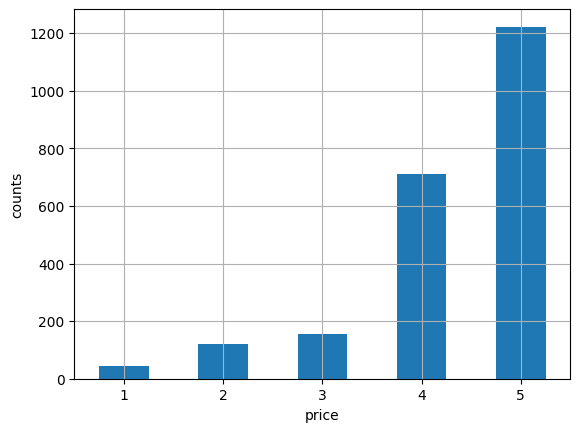

In [132]:
cut_and_plot(residental['price_per_metr'])

In [133]:
residental.drop(residental[residental['price_per_metr']<4e7].index,inplace=True)

In [134]:
residental.drop(residental[(residental['total_rooms']==0)&(residental['real_estate_area']>60)].index,inplace=True)

In [136]:
residental.drop(residental[(residental['real_estate_area']<25)&(residental['total_rooms']>0)].index,inplace=True)

In [152]:
residental.drop(residental[residental['price_per_metr']>0.6e9].index,inplace=True)

## remove total_rooms per area

In [184]:
# index=[]
residental.drop(residental[(residental['total_rooms']>1)&(residental['real_estate_area']<50)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>2)&(residental['real_estate_area']<80)&(residental['real_estate_area']>=50)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>3)&(residental['real_estate_area']<120)&(residental['real_estate_area']>=80)].index,inplace=True)
residental.drop(residental[(residental['total_rooms']>5)&(residental['real_estate_area']<200)&(residental['real_estate_area']>=120)].index,inplace=True)


<Axes: xlabel='real_estate_area', ylabel='total_rooms'>

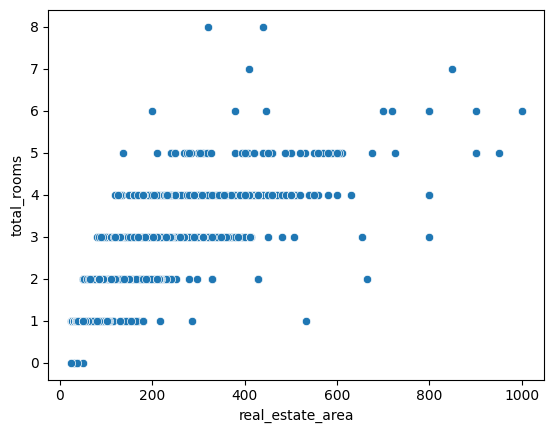

In [185]:
sns.scatterplot(x=residental['real_estate_area'],y=residental['total_rooms'])

In [195]:
drop_facility=['قابل تبدیل','پاساژ','مشارکتی','موقعیت اداری','مال','معاوضه','نوساز']
residental.drop(drop_facility,axis=1,inplace=True)

In [196]:
residental.columns

Index(['district_number', 'district_name', 'real_estate_type',
       'real_estate_area', 'total_rooms', 'number_of_parking',
       'real_estate_age', 'price', 'facilities', 'آسانسور', 'آنتن مرکزی',
       'استخر', 'انباری', 'بالکن', 'تهویه مطبوع', 'جکوزی', 'درب ریموت',
       'روف گاردن', 'سالن اجتماعات', 'سالن ورزش', 'سونا', 'قدرالسهم',
       'قیمت توافقی', 'لابی', 'نگهبان', 'وام دار', 'پارکینگ', 'پیش فروش',
       'price_per_metr', 'rooms_per_area'],
      dtype='object')

In [203]:
residental.loc[residental[residental['number_of_parking']>0].index,'پارکینگ']=1

In [208]:
residental['district_name'].unique()

array(['ستارخان', 'شهرارا', 'مرزداران شرقی', 'طوس', 'جیحون', 'دریان نو',
       'استاد معین', 'بریانک', 'تهران ویلا', 'شهرک غرب', 'جنت اباد جنوبی',
       'سازمان اب', 'جردن', 'فردوس', 'سازمان برنامه مرکزی', 'اوین',
       'بلوار میرداماد', 'سازمان برنامه جنوبی', 'ارم', 'پونک جنوبی',
       'مرزداران', 'صادقیه', 'بلوار فردوس شرقی', 'بلوار فردوس غربی',
       'قیطریه', 'هروی', 'سهروردی جنوبی', 'سهروردی شمالی', 'پونک',
       'سازمان برنامه شمالی', 'شهر زیبا', 'پونک شمالی',
       'شمس اباد - مجیدیه', 'سید خندان', 'خواجه عبدالله انصاری',
       'جنت اباد مرکزی', 'فرمانیه', 'سعادت اباد', 'کوهک', 'نیاوران',
       'اختیاریه', 'مهران', 'جمشیدیه', 'پاتریس لومومبا', 'جنت اباد شمالی',
       'جنت اباد', 'دروس', 'باغ فیض', 'شهران شمالی', 'شهران\u200e',
       'اباذر', 'شهرک پرواز', 'الهیه', 'فرشته', 'شهرک راه اهن - گلستان',
       'پیامبر شرقی', 'شهران جنوبی', 'شهرک هما', 'دریا', 'کوی فراز',
       'بهنام\u200e', 'کن', 'مرزداران غربی', 'ونک', 'زعفرانیه',
       'دولت - کلاهدوز', 'پاسداران', 'بل